# Project Topic: Content based News Recommender Systems
<br>

### Team Members
**Abdul Moid Mohammed** <br>
**Mohammed Abdelghani** <br>
**Shaik Mohammed Sohaib**

### 1. importing main libraries:

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as plotly

### 2. loading data

In [137]:
news_dataset = pd.read_json("News_Category_Dataset_v2.json",lines=True)

In [117]:
news_dataset.shape

(200853, 6)

In [118]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [119]:
news_dataset.head(10)

,category,headline,authors,link,short_description,date
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",2018-05-26
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harassment Claims Could Undermine Legacy,Ron Dicker,https://www.huffingtonpost.com/entry/morgan-freeman-devastated-sexual-misconduct_us_5b096319e4b0802d69cba298,"""It is not right to equate horrific incidents of sexual assault with misplaced compliments or humor,"" he said in a statement.",2018-05-26
6,ENTERTAINMENT,Donald Trump Is Lovin' New McDonald's Jingle In 'Tonight Show' Bit,Ron Dicker,https://www.huffingtonpost.com/entry/donald-trump-mcondalds-tonight-show_us_5b093561e4b0fdb2aa53daba,"It's catchy, all right.",2018-05-26
7,ENTERTAINMENT,What To Watch On Amazon Prime That’s New This Week,Todd Van Luling,https://www.huffingtonpost.com/entry/amazon-prime-what-to-watch_us_5b044625e4b0c0b8b23ec14f,There's a great mini-series joining this week.,2018-05-26
8,ENTERTAINMENT,Mike Myers Reveals He'd 'Like To' Do A Fourth Austin Powers Film,Andy McDonald,https://www.huffingtonpost.com/entry/mike-myers-reveals-he-wants-to-do-a-fourth-austin-powers-film_us_5b096198e4b0802d69cb9f15,"Myer's kids may be pushing for a new ""Powers"" film more than anyone.",2018-05-26
9,ENTERTAINMENT,What To Watch On Hulu That’s New This Week,Todd Van Luling,https://www.huffingtonpost.com/entry/hulu-what-to-watch_us_5b0445bae4b0c0b8b23ec046,You're getting a recent Academy Award-winning movie.,2018-05-26


## 3. data preprocessing:

#### a: limiting the data size because the complete dataset needs huge computing power:

In [138]:
# Keeping data from 2015 onwards
news_dataset['date'] = pd.to_datetime(news_dataset['date'])
news_dataset = news_dataset[news_dataset['date'] >= '2017-01-01']

In [139]:
news_dataset.shape

(38472, 6)

### b: removing all the short headline articles:

After stop words removal from headline, the articles with very short headline may become blank headline articles. So let's remove all the articles with less words(<5) in the headline.

In [141]:
#Removing articles with short headlines, since they are of not much use when we take headline for feature engineering
news_dataset = news_dataset[news_dataset['headline'].apply(lambda x: len(x.split())>5)]
print("Total number of articles after removal of headlines with short title:", news_dataset.shape[0])

Total number of articles after removal of headlines with short title: 37145


### c: Checking and removing all the duplicates:

Since some articles are exactly same in headlines, so let's remove all such articles having duplicate headline appearance.

**There are no null values so lets check for duplicates:** 

In [123]:
data_duplicates = news_dataset.duplicated('link',keep=False)
news_dataset = news_dataset[~data_duplicates]
print("Total number of rows after removing duplicates are: ",news_dataset.shape[0])

Total number of rows after removing duplicates are:  37145


### d: Checking for missing values:

In [124]:
# check for null values
news_dataset.isna().sum()

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64

## 4. data exploration:

### a. basic statistics - number of articles, authors, categories:

In [125]:
print("Number of News Articles: ", news_dataset.shape[0])
print("Number of Authors: ", news_dataset["authors"].nunique())
print("Total Number of Unique Categories: ", news_dataset["category"].nunique())

Number of News Articles:  37145
Number of Authors:  5360
Total Number of Unique Categories:  31


### b. distribution of articles category-wise:

In [126]:
fig = plotly.Figure([plotly.Bar(x = news_dataset["category"].value_counts().index, y = news_dataset["category"].value_counts().values)])
fig['layout'].update(title={"text" : 'Distribution of articles category-wise','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="Category name", yaxis_title="Number of articles")
fig.update_layout(width=800,height=700)
fig

From the bar chart, we can observe that **politics** category has **highest** number of articles then **entertainment** and so on.

### c: number of articles per month:

Let's first group the data on monthly basis using **resample()** function.

In [13]:
news_articles_per_month = news_dataset.resample('m',on = 'date')['headline'].count()
news_articles_per_month.head()

date
2017-01-31    2747
2017-02-28    2474
2017-03-31    2580
2017-04-30    2468
2017-05-31    2588
Freq: M, Name: headline, dtype: int64

In [14]:
fig = plotly.Figure([plotly.Bar(x=news_articles_per_month.index.strftime("%b"), y=news_articles_per_month)])
fig['layout'].update(title={"text" : 'Distribution of articles month-wise','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="Month",yaxis_title="Number of articles")
fig.update_layout(width=500,height=500)
fig

From the bar chart, we can observe that **January** month has **highest** number of articles then **March** and so on.  

### d: number of articles each year:

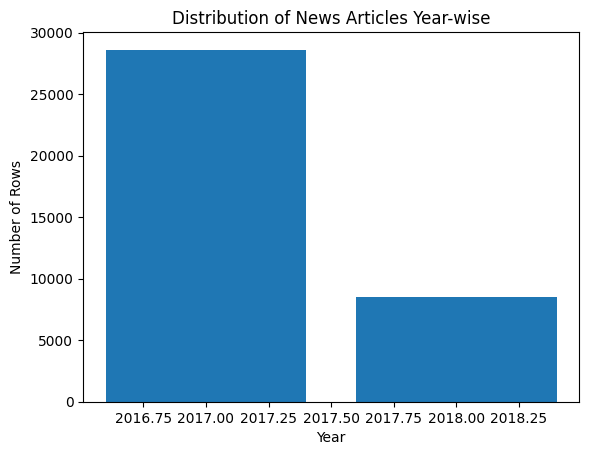

In [127]:
#Lets visualize the number of articles each year
news_dataset['years'] = news_dataset["date"].dt.year
year_count = news_dataset.groupby('years').size()

# plot the year count as a bar graph
plt.bar(year_count.index, year_count.values)
plt.xlabel('Year')
plt.ylabel('Number of Rows')
plt.title('Distribution of News Articles Year-wise')
plt.show()

###### Since after text preprocessing the original headlines will be modified and it doesn't make sense to recommend articles by displaying modified headlines so let's copy the dataset into some other dataset and perform text preprocessing on the later:

In [103]:
tmp_news_articles = news_dataset.copy()

<br> 

## 5. Text-Preprocessing 

### a: remove stopwords:

Stop words are not much helpful in analyis and also their inclusion consumes much time during processing so let's remove these.

In [128]:
#install nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

# Below libraries are for text processing using NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

* Tokenizing the text in headline category:

In [105]:
news_dataset['headline'] = news_dataset['headline'].apply(nltk.word_tokenize)

* Removing stopwords:

In [20]:
stop_words = set(stopwords.words('english'))
news_dataset['headline'] = news_dataset['headline'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
news_dataset['headline'].head(10)

0    [2, Mass, Shootings, Texas, Last, Week, ,, 1, TV]
1    [Smith, Joins, Diplo, Nicky, Jam, 2018, World,...
2         [Hugh, Grant, Marries, First, Time, Age, 57]
3    [Jim, Carrey, Blasts, 'Castrato, ', Adam, Schi...
4    [Julianna, Margulies, Uses, Donald, Trump, Poo...
5    [Morgan, Freeman, 'Devastated, ', Sexual, Hara...
6    [Donald, Trump, Lovin, ', New, McDonald, 's, J...
7                 [Watch, Amazon, Prime, ’, New, Week]
8    [Mike, Myers, Reveals, 'd, 'Like, ', Fourth, A...
9                          [Watch, Hulu, ’, New, Week]
Name: headline, dtype: object

* Doing the same for short-description and **Tokenizing** the text in headline category:

In [21]:
news_dataset['short_description'] = news_dataset['short_description'].apply(nltk.word_tokenize)

* Removing stopwords:

In [22]:
news_dataset['short_description'] = news_dataset['short_description'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
news_dataset['short_description'].head(10)

0    [left, husband, ., killed, children, ., anothe...
1                                    [course, song, .]
2    [actor, longtime, girlfriend, Anna, Eberstein,...
3    [actor, gives, Dems, ass-kicking, fighting, ha...
4    [``, Dietland, '', actress, said, using, bags,...
5    [``, right, equate, horrific, incidents, sexua...
6                            ['s, catchy, ,, right, .]
7           ['s, great, mini-series, joining, week, .]
8    [Myer, 's, kids, may, pushing, new, ``, Powers...
9    ['re, getting, recent, Academy, Award-winning,...
Name: short_description, dtype: object

### b. Lemmatization.
* find the base form(lemma) of words to consider different inflections of a word same as lemma:

In [25]:
lemmatizer = WordNetLemmatizer()
news_dataset['headline'] = news_dataset['headline'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
news_dataset['short_description'] = news_dataset['short_description'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
news_dataset['short_description'].head(10)

0    [left, husband, ., killed, child, ., another, ...
1                                    [course, song, .]
2    [actor, longtime, girlfriend, Anna, Eberstein,...
3    [actor, give, Dems, ass-kicking, fighting, har...
4    [``, Dietland, '', actress, said, using, bag, ...
5    [``, right, equate, horrific, incident, sexual...
6                            ['s, catchy, ,, right, .]
7           ['s, great, mini-series, joining, week, .]
8    [Myer, 's, kid, may, pushing, new, ``, Powers,...
9    ['re, getting, recent, Academy, Award-winning,...
Name: short_description, dtype: object

### c. define a function to extract the website name from a URL:

In [26]:
from urllib.parse import urlparse

def get_website_name(url):
    parsed_url = urlparse(url)
    return parsed_url.netloc.split(".")[1]

#### apply the function to each row in the "link" column:

In [27]:
news_dataset["Website_Name"] = news_dataset["link"].apply(get_website_name)
news_dataset["Website_Name"]

0        huffingtonpost
1        huffingtonpost
2        huffingtonpost
3        huffingtonpost
4        huffingtonpost
              ...      
38467    huffingtonpost
38468    huffingtonpost
38469    huffingtonpost
38470    huffingtonpost
38471    huffingtonpost
Name: Website_Name, Length: 37145, dtype: object

In [28]:
fig = plotly.Figure([plotly.Bar(x = news_dataset["Website_Name"].value_counts().index, y = news_dataset["Website_Name"].value_counts().values)])
fig['layout'].update(title={"text" : 'Distribution of articles publisher-wise','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="Category name", yaxis_title="Number of articles")
fig.update_layout(width=800,height=700)
fig

#### From the above visualization, we came to know that all the news articles are from the same publisher "Website" so we're dropping this attribute.

#### Drop link, Website_Name and years attributes:

In [206]:
news_dataset = news_dataset.drop('link', axis=1)
news_dataset = news_dataset.drop('Website_Name', axis=1)
news_dataset = news_dataset.drop('years', axis=1)
news_dataset.head(10)

,category,headline,authors,link,short_description,date
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",2018-05-26
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harassment Claims Could Undermine Legacy,Ron Dicker,https://www.huffingtonpost.com/entry/morgan-freeman-devastated-sexual-misconduct_us_5b096319e4b0...,"""It is not right to equate horrific incidents of sexual assault with misplaced compliments or hu...",2018-05-26
6,ENTERTAINMENT,Donald Trump Is Lovin' New McDonald's Jingle In 'Tonight Show' Bit,Ron Dicker,https://www.huffingtonpost.com/entry/donald-trump-mcondalds-tonight-show_us_5b093561e4b0fdb2aa53...,"It's catchy, all right.",2018-05-26
7,ENTERTAINMENT,What To Watch On Amazon Prime That’s New This Week,Todd Van Luling,https://www.huffingtonpost.com/entry/amazon-prime-what-to-watch_us_5b044625e4b0c0b8b23ec14f,There's a great mini-series joining this week.,2018-05-26
8,ENTERTAINMENT,Mike Myers Reveals He'd 'Like To' Do A Fourth Austin Powers Film,Andy McDonald,https://www.huffingtonpost.com/entry/mike-myers-reveals-he-wants-to-do-a-fourth-austin-powers-fi...,"Myer's kids may be pushing for a new ""Powers"" film more than anyone.",2018-05-26
9,ENTERTAINMENT,What To Watch On Hulu That’s New This Week,Todd Van Luling,https://www.huffingtonpost.com/entry/hulu-what-to-watch_us_5b0445bae4b0c0b8b23ec046,You're getting a recent Academy Award-winning movie.,2018-05-26


In [30]:
news_dataset.to_csv('Processed_Data.csv', index=False)

In [31]:
news_dataset_processed = pd.read_csv('Processed_Data.csv')
news_dataset_processed.head(15)

,category,headline,authors,short_description,date,day and month
0,CRIME,"['2', 'Mass', 'Shootings', 'Texas', 'Last', 'W...",Melissa Jeltsen,"['left', 'husband', '.', 'killed', 'child', '....",2018-05-26,Sat_May
1,ENTERTAINMENT,"['Smith', 'Joins', 'Diplo', 'Nicky', 'Jam', '2...",Andy McDonald,"['course', 'song', '.']",2018-05-26,Sat_May
2,ENTERTAINMENT,"['Hugh', 'Grant', 'Marries', 'First', 'Time', ...",Ron Dicker,"['actor', 'longtime', 'girlfriend', 'Anna', 'E...",2018-05-26,Sat_May
3,ENTERTAINMENT,"['Jim', 'Carrey', 'Blasts', ""'Castrato"", ""'"", ...",Ron Dicker,"['actor', 'give', 'Dems', 'ass-kicking', 'figh...",2018-05-26,Sat_May
4,ENTERTAINMENT,"['Julianna', 'Margulies', 'Uses', 'Donald', 'T...",Ron Dicker,"['``', 'Dietland', ""''"", 'actress', 'said', 'u...",2018-05-26,Sat_May
5,ENTERTAINMENT,"['Morgan', 'Freeman', ""'Devastated"", ""'"", 'Sex...",Ron Dicker,"['``', 'right', 'equate', 'horrific', 'inciden...",2018-05-26,Sat_May
6,ENTERTAINMENT,"['Donald', 'Trump', 'Lovin', ""'"", 'New', 'McDo...",Ron Dicker,"[""'s"", 'catchy', ',', 'right', '.']",2018-05-26,Sat_May
7,ENTERTAINMENT,"['Watch', 'Amazon', 'Prime', '’', 'New', 'Week']",Todd Van Luling,"[""'s"", 'great', 'mini-series', 'joining', 'wee...",2018-05-26,Sat_May
8,ENTERTAINMENT,"['Mike', 'Myers', 'Reveals', ""'d"", ""'Like"", ""'...",Andy McDonald,"['Myer', ""'s"", 'kid', 'may', 'pushing', 'new',...",2018-05-26,Sat_May
9,ENTERTAINMENT,"['Watch', 'Hulu', '’', 'New', 'Week']",Todd Van Luling,"[""'re"", 'getting', 'recent', 'Academy', 'Award...",2018-05-26,Sat_May


<br>
<br>

## 4. Approaches:

##### In this section, we find similarity based on the headline feature of the data.

### a. bag of words:

* Bag of Words **(BoW)** is a text representation approach that counts the frequency of
occurrence of each word in the text and creates a vector of word frequencies for each
document.
* In this project, the BoW approach was used to analyze the text in news articles and
create a vector representation of the news articles based on the frequency of words.

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
headline_vectorizer = CountVectorizer()
headline_features   = headline_vectorizer.fit_transform(tmp_news_articles['headline'])

In [34]:
headline_features.get_shape()

(37145, 24441)

**The output **BoW matrix**(headline_features) is a sparse matrix:**

In [109]:
pd.set_option('display.max_colwidth', None)  # To display a very long headline completely

In [207]:
from sklearn.metrics import pairwise_distances
def bag_of_words_based_model(row_index, num_similar_items):
    couple_dist = pairwise_distances(headline_features,headline_features[row_index])
    indices = np.argsort(couple_dist.ravel())[0:num_similar_items]
    df = pd.DataFrame({'publish_date': news_dataset['date'][indices].values,
               'headline': news_dataset['headline'][indices].values,
                'Euclidean similarity with the queried article': 1/couple_dist[indices].ravel()})
    print("="*30,"Queried article details","="*30)
    print('headline : ', news_dataset['headline'][indices[0]])
    print("\n","="*25,"Recommended articles : ","="*23)
    #return df.iloc[1:,1]
    return df.sort_values(by='Euclidean similarity with the queried article', ascending=False)

In [208]:
bag_of_words_based_model(1, 11) # Change the row index for any other queried article

============================== Queried article details ==============================
headline :  Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song

 ========================= Recommended articles :  =======================


C:\Users\mohamed\AppData\Local\Temp\ipykernel_6956\3241315638.py:7: RuntimeWarning:

divide by zero encountered in divide



,publish_date,headline,Euclidean similarity with the queried article
0,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,inf
1,2017-06-09,Evidence Is Strong That Trump Obstructed Justice: The Basics,0.267261
2,2017-05-26,People Whose IDs Were Stolen In Bot Push Against Net Neutrality Demand FCC Probe,0.258199
3,2017-11-09,"If This Case Is Heard By The Supreme Court, It Could End The Death Penalty",0.258199
4,2017-03-22,Suspected U.S. Airstrike Hits School Sheltering Displaced People In Syria,0.258199
5,2018-03-08,Stormy Who? Democratic Leaders Won't Talk About Trump's Porn Star Payoff,0.250000
6,2017-10-02,How Hurricane Responders Track People Whose Lives Depend On Power,0.250000
7,2017-07-18,"News Roundup for July 18, 2017",0.250000
8,2017-10-02,Here’s How A Guy Can Stroll Into A Las Vegas Hotel With An Arsenal,0.250000
9,2017-12-11,Boxer Stephen Smith Nearly Loses Ear. We Nearly Lose Our Lunch. (GRAPHIC),0.250000


Above function recommends **10 similar** articles to the **queried**(read) article based on the headline. It accepts two arguments - index of already read artile and the total number of articles to be recommended.

Based on the **Euclidean distance** it finds out 10 nearest neighbors and recommends. 

**Disadvantages**
1. It gives very low **importance** to less frequently observed words in the corpus. Few words from the queried article like "employer", "flip", "fire" appear less frequently in the entire corpus so **BoW** method does not recommend any article whose headline contains these words. Since **trump** is commonly observed word in the corpus so it is recommending the articles with headline containing "trump".   
2. **BoW** method doesn't preserve the order of words.

To overcome the first disadvantage we use **TF-IDF** method for feature representation.

### b. TF-IDF method:

* Term Frequency-Inverse Document Frequency (TF-IDF) is a text representation approach that takes into account the frequency of occurrence of each word in a document and the frequency of the word in the entire corpus.
* TF-IDF gives more importance to less frequent words in a corpus. It assigns a weight to each term(word) in a document based on Term frequency(TF) and inverse document frequency(IDF).
###### TF(i,j) = (# times word i appears in document j) / (# words in document j)
    IDF(i,D) = log_e(#documents in the corpus D) / (#documents containing word i)
    weight(i,j) = TF(i,j) x IDF(i,D)
    So if a word occurs more number of times in a document but less number of times in
    all other documents then its TF-IDF value will be high.
    In this project, along with TF-IDF, we also experimented with cosine similarity,
    Euclidean distance, and Pearson Correlation for recommending articles.

**With TF-IDF, we will be experimentingwith cosine similarity, euclidean similarity, and pearson correlation, to find which one gives best results**

In [38]:
# Importing necessary libraries for this section
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

In [39]:
news_dataset.head(10000).to_csv('Reduced_Processed_Data2.csv', index=False)
tfidf_data_processed = pd.read_csv('Reduced_Processed_Data2.csv')
tfidf_data_processed.head()

,category,headline,authors,short_description,date,day and month
0,CRIME,"['2', 'Mass', 'Shootings', 'Texas', 'Last', 'Week', ',', '1', 'TV']",Melissa Jeltsen,"['left', 'husband', '.', 'killed', 'child', '.', 'another', 'day', 'America', '.']",2018-05-26,Sat_May
1,ENTERTAINMENT,"['Smith', 'Joins', 'Diplo', 'Nicky', 'Jam', '2018', 'World', 'Cup', ""'s"", 'Official', 'Song']",Andy McDonald,"['course', 'song', '.']",2018-05-26,Sat_May
2,ENTERTAINMENT,"['Hugh', 'Grant', 'Marries', 'First', 'Time', 'Age', '57']",Ron Dicker,"['actor', 'longtime', 'girlfriend', 'Anna', 'Eberstein', 'tied', 'knot', 'civil', 'ceremony', '.']",2018-05-26,Sat_May
3,ENTERTAINMENT,"['Jim', 'Carrey', 'Blasts', ""'Castrato"", ""'"", 'Adam', 'Schiff', 'Democrats', 'New', 'Artwork']",Ron Dicker,"['actor', 'give', 'Dems', 'ass-kicking', 'fighting', 'hard', 'enough', 'Donald', 'Trump', '.']",2018-05-26,Sat_May
4,ENTERTAINMENT,"['Julianna', 'Margulies', 'Uses', 'Donald', 'Trump', 'Poop', 'Bags', 'Pick', 'Dog']",Ron Dicker,"['``', 'Dietland', ""''"", 'actress', 'said', 'using', 'bag', '``', 'really', 'cathartic', ',', 'therapeutic', 'moment', '.', ""''""]",2018-05-26,Sat_May


In [153]:
tfidf_vectorizer = TfidfVectorizer(min_df = 0)

# fit and transform the text column into a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(news_dataset_processed['headline'])

In [154]:
#Converting to sparse matrices
sparse_tfidf = csr_matrix(tfidf_matrix)

# calculate the cosine similarity matrix of the TF-IDF matrix
cosine_sim = cosine_similarity(sparse_tfidf)

In [155]:
# define a function to get the top n similar articles based on cosine similarity
def get_top_similar_articles(article_index, n=10):
    # get the pairwise similarity scores of the article with all other articles
    similarity_scores = list(enumerate(cosine_sim[article_index]))

    # sort the articles based on their similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # get the top n similar articles (excluding itself)
    sim_scores = similarity_scores[1:n+1]
    headlines_idx = [i[0] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]

    df = pd.DataFrame({'publish_date': news_dataset['date'][headlines_idx].values,
               'headline': news_dataset['headline'][headlines_idx].values,
                'author': news_dataset['authors'][headlines_idx].values,
                'Cosine similarity with the queried article': similarity_scores
                      })
    pd.options.display.max_colwidth = 100
    print("="*30,"Queried article details","="*30)
    print('headline : ',news_dataset['headline'][headlines_idx[0]])
    print("\n","="*25,"Recommended articles : ","="*23)
    return df.sort_values(by='Cosine similarity with the queried article', ascending=False)

In [156]:
# get the top 10 similar articles to the first article in the dataset
get_top_similar_articles(0, n=5)

============================== Queried article details ==============================
headline :  Rock & Roll Hall Of Fame Might Induct Radiohead In 2018

 ========================= Recommended articles :  =======================


,publish_date,headline,author,Cosine similarity with the queried article
0,2017-10-05,Rock & Roll Hall Of Fame Might Induct Radiohead In 2018,Todd Van Luling,0.402405
1,2018-02-23,Kim Cattrall’s 'Sex And The City' Boo Sides With Sarah Jessica Parker,Elyse Wanshel,0.393565
2,2017-10-09,Cheap Weekend Getaways Where You Can See Peak Foliage In Action,Brittany Nims,0.383663
3,2018-02-15,Rapper French Montana Launches Campaign To Help Dreamers Go To College,Carolina Moreno,0.380069
4,2017-10-05,The Moment Bernie Sanders And Larry David Find Out They're Related Is Too Good,Rebecca Shapiro,0.373552


- Now lets experiment using Euclidean Similarity

In [157]:
from sklearn.metrics import pairwise_distances

# define a function to get the top n similar articles based on euclidean similarity
def get_top_similar_articles_euclidean(row_index, n):
    dist = pairwise_distances(tfidf_matrix,tfidf_matrix[row_index])
    indices = np.argsort(dist.ravel())[0:n]
    df = pd.DataFrame({'publish_date': news_dataset['date'][indices].values,
               'headline':news_dataset['headline'][indices].values,
                'Euclidean similarity with the queried article': 1/dist[indices].ravel()})
    #pd.options.display.max_colwidth = 100
    print("="*30,"Queried article details","="*30)
    print('headline : ',news_dataset['headline'][indices[0]])
    print("\n","="*25,"Recommended articles : ","="*23)
    
    #return df.iloc[1:,1]
    return df.iloc[1:,].sort_values(by='Euclidean similarity with the queried article', ascending=False)

In [158]:
# get the top 10 similar articles to the first article in the dataset
get_top_similar_articles_euclidean(0, n=5)

============================== Queried article details ==============================
headline :  There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV

 ========================= Recommended articles :  =======================


C:\Users\mohamed\AppData\Local\Temp\ipykernel_6956\2887321684.py:8: RuntimeWarning:

divide by zero encountered in divide



,publish_date,headline,Euclidean similarity with the queried article
1,2017-10-05,Rock & Roll Hall Of Fame Might Induct Radiohead In 2018,0.914706
2,2018-02-23,Kim Cattrall’s 'Sex And The City' Boo Sides With Sarah Jessica Parker,0.908015
3,2017-10-09,Cheap Weekend Getaways Where You Can See Peak Foliage In Action,0.900691
4,2018-02-15,Rapper French Montana Launches Campaign To Help Dreamers Go To College,0.898076


### Till now, we experimented with Cosine Similarity and Euclidean Similarity. 
### Pearson Correlation Coefficient.

In [159]:
tfidf_array = tfidf_matrix.toarray()
tfidf_mean = np.mean(tfidf_array, axis=0)
tfidf_std = np.std(tfidf_array, axis=0)
tfidf_normalized = (tfidf_array - tfidf_mean) / tfidf_std
pearson_sim = np.corrcoef(tfidf_normalized)

**function to get top N most similar articles:**

In [160]:
def get_similar_articles(article_idx, n):
    # Get the Pearson correlation scores of the article
    article_scores = list(enumerate(pearson_sim[article_idx]))
    # Sort the articles by Pearson correlation scores
    article_scores = sorted(article_scores, key=lambda x: x[1], reverse=True)
    # Get the top n most similar articles (excluding itself)
    pearson_values = article_scores[1:n+1]
    
    headlines_idx = [i[0] for i in pearson_values]
    similarity_scores = [i[1] for i in pearson_values]
    
    #Dataframe for displaying results
    df = pd.DataFrame({'publish_date': news_dataset['date'][headlines_idx].values,
                       'headline': news_dataset['headline'][headlines_idx].values,
                       'Pearson with the queried article': similarity_scores})
    #pd.options.display.max_colwidth = 100
    print("="*30,"Queried article details","="*30)
    print('headline : ', news_dataset['headline'][headlines_idx[0]])
    print("\n","="*25,"Recommended articles : ","="*23)
    return df.sort_values(by='Pearson with the queried article', ascending=False)

In [161]:
get_similar_articles(1, 15)

============================== Queried article details ==============================
headline :  Already Threatened Polar Bears Face Food Shortage Crisis Amid Climate Change

 ========================= Recommended articles :  =======================


,publish_date,headline,Pearson with the queried article
0,2018-02-02,Already Threatened Polar Bears Face Food Shortage Crisis Amid Climate Change,0.557030
1,2018-01-16,Keira Knightley Is Sick Of Female Characters Getting Raped All The Time,0.545168
2,2017-05-03,Queer Community Ready To Wage War On Trump's Rumored 'Religious Freedom' Order,0.220049
3,2018-04-18,Nikki Haley Hits Back At White House: 'I Don't Get Confused',0.162319
4,2017-02-02,Spuds MacKenzie Returns In Bud Light Super Bowl Ad,0.156712
5,2017-03-07,"HUFFPOST HILL - 'Geez, Look At The SIZE Of That Thing!' An Accepted Political Argument Now",0.143842
6,2017-07-26,14 Photos Show The Utter Bravery Of Serving While Trans,0.113395
7,2017-11-04,"George H.W. Bush Called Trump A 'Blowhard' And Said, 'I Don't Like Him'",0.104539
8,2017-03-09,China Moves To Approve At Least 35 Trump Trademarks,0.103303
9,2018-04-17,Facebook Didn’t Seem To Care I Was Being Sexually Harassed Until I Decided To Write About It,0.099381


### c. Word2Vec:

#### Word2Vec is a text representation approach that creates vector representations of words based on their content. Word2Vec considers the words that frequently appear together in a text and creates a vector representation of the words that captures the semantic relationships. 
#### For a given corpus, during training it observes the patterns and represents each word by a d-dimensional vector.
* In this project, the TF-IDF approach was used along with cosine similarity and
* Euclidean distance to analyze the text in news articles and create a vector representation of the news articles and  recommend articles.

##### Use code below to download the pre-trained model:
* import gensim.downloader as api
* path = api.load("word2vec-google-news-300", return_path=True)
* print(path)

In [49]:
# using of the download the pre-trained model:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

# if you vector file is in binary format, change to 'binary=True'
loaded_model = gensim.models.KeyedVectors.load_word2vec_format("C:\\Users\\mohamed\\gensim-data\\word2vec-google-news-300\\word2vec-google-news-300.gz", binary=True)

In [50]:
loaded_model['news']

array([-0.13867188,  0.04370117, -0.13085938, -0.16796875, -0.06054688,
       -0.07080078,  0.00854492, -0.09960938,  0.19628906,  0.14648438,
       -0.23046875, -0.09619141, -0.140625  ,  0.25585938, -0.16699219,
        0.14257812, -0.16992188,  0.06884766,  0.23925781, -0.28515625,
        0.17089844,  0.17089844,  0.05615234, -0.06445312,  0.13867188,
        0.32226562,  0.05078125,  0.27148438, -0.00564575,  0.02587891,
       -0.05639648,  0.03125   ,  0.171875  , -0.18261719,  0.05029297,
       -0.01062012, -0.02600098,  0.20019531, -0.07568359,  0.125     ,
        0.01300049, -0.17089844, -0.09667969,  0.21972656,  0.06494141,
        0.24804688,  0.11083984,  0.0267334 , -0.10986328,  0.17578125,
        0.328125  , -0.11865234,  0.03222656,  0.30273438,  0.09179688,
       -0.05224609, -0.27539062, -0.046875  ,  0.20996094, -0.20410156,
        0.10595703, -0.08398438, -0.09765625, -0.16015625, -0.0045166 ,
        0.09228516,  0.05737305, -0.04418945,  0.06445312,  0.16

In [51]:
loaded_model.vectors

array([[ 1.1291504e-03, -8.9645386e-04,  3.1852722e-04, ...,
        -1.5640259e-03, -1.2302399e-04, -8.6307526e-05],
       [ 7.0312500e-02,  8.6914062e-02,  8.7890625e-02, ...,
        -4.7607422e-02,  1.4465332e-02, -6.2500000e-02],
       [-1.1779785e-02, -4.7363281e-02,  4.4677734e-02, ...,
         7.1289062e-02, -3.4912109e-02,  2.4169922e-02],
       ...,
       [-1.9653320e-02, -9.0820312e-02, -1.9409180e-02, ...,
        -1.6357422e-02, -1.3427734e-02,  4.6630859e-02],
       [ 3.2714844e-02, -3.2226562e-02,  3.6132812e-02, ...,
        -8.8500977e-03,  2.6977539e-02,  1.9042969e-02],
       [ 4.5166016e-02, -4.5166016e-02, -3.9367676e-03, ...,
         7.9589844e-02,  7.2265625e-02,  1.3000488e-02]], dtype=float32)

In [52]:
import time
t = time.process_time()

vocabulary = list(loaded_model.index_to_key)
word2vec_headline = []

for i in tmp_news_articles['headline']:
    word2vec_word = np.zeros(300, dtype="float32")
    for word in i.split():
        if word in vocabulary:
            word2vec_word = np.add(word2vec_word, loaded_model[word])
    word2vec_word = np.divide(word2vec_word, len(i.split()))
    word2vec_headline.append(word2vec_word)
word2vec_headline = np.array(word2vec_headline)

elapsed_time = time.process_time() - t
print('Elapsed time: {:.2f} in seconds' .format(elapsed_time))

Elapsed time: 3505.08 in seconds


In [195]:
from sklearn.metrics import pairwise_distances

# define a function to get the top n similar articles based on euclidean similarity
def avg_word2vec_model(row_index, num_similar_items):
    
    dist = pairwise_distances(word2vec_headline, word2vec_headline[row_index].reshape(1,-1))
    indices = np.argsort(dist.ravel())[0:num_similar_items]
    
    df = pd.DataFrame({'publish_date': news_dataset['date'][indices].values,
               'headline': news_dataset['headline'][indices].values,
                'Euclidean similarity with the queried article': dist[indices].ravel()})
    
    print("="*30,"Queried article details","="*30)
    print('headline : ', news_dataset['headline'][indices[0]])
    print("\n","="*25,"Recommended articles : ","="*23)
    return df.iloc[1:,].sort_values(by='Euclidean similarity with the queried article', ascending=False)
    #return df.iloc[1:,]

In [196]:
avg_word2vec_model(201, 10)

============================== Queried article details ==============================
headline :  Gun Reform Advocate Lucy McBath Heads To Runoff For Georgia House Seat

 ========================= Recommended articles :  =======================


,publish_date,headline,Euclidean similarity with the queried article
9,2017-08-21,The Troubling Persistence Of The Hatred Of Black People,0.977874
8,2017-05-26,"Donald Trump's Isolationism Is His First Great Export, And Italy Could Be First In Line",0.968792
7,2017-08-29,Live Gecko Found Inside A Man's Ear,0.967747
6,2017-01-30,Gina Rodriguez Promises To Use New TV Deal To Spotlight ‘Faces Unseen’,0.960570
5,2018-05-23,GOP Candidate Who Pointed Gun At Teenager Advances To Georgia Governor Primary Runoff,0.944075
4,2017-12-14,Russell Simmons Denies Rape Accusations With #NotMe,0.937375
3,2017-06-30,Trump's Voter Fraud Expert Says 'We May Never Know' If Millions Really Voted Illegally,0.918897
2,2017-06-30,"Now Trump Is Suggesting Maybe The Senate Should Repeal First, Replace Later",0.908970
1,2017-08-14,"Taraji P. Henson On Charlottesville: We Must Continue To Fight, But Only Through Love",0.908415


In [55]:
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

**define a function to generate word embeddings for a headline:**

In [165]:
def generate_embeddings(headline):
    words = headline
    embeddings = [loaded_model[word] for word in words if word in loaded_model]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return None

define a function using **cosine similarity** to recommend top-N headlines based on a given headline:

In [166]:
# define a function to get the top n similar articles based on cosine similarity
def recommend_headlines(headline, data, top_n=5):
    # generate word embeddings for the input headline
    query_embedding = generate_embeddings(headline)
    if query_embedding is None:
        return "Sorry, we could not generate a word embedding for the input headline."

    # compute cosine similarity between the input headline and all other headlines
    headline_embeddings = [generate_embeddings(h) for h in data['headline']]
    headline_embeddings = [e for e in headline_embeddings if e is not None]
    if not headline_embeddings:
        return "Sorry, we could not generate any word embeddings from the headlines in the dataset."
    similarity_scores = cosine_similarity([query_embedding], headline_embeddings)[0]

    # sort headlines by their cosine similarity scores and return the top N most similar ones
    top_indices = similarity_scores.argsort()[::-1][:top_n]
    df = pd.DataFrame({'publish_date': data['date'][top_indices].values,
                       'headline': data['headline'][top_indices].values,
                       'cosine similarity': similarity_scores[top_indices]})

    # display the input headline and the recommended headlines
    print("="*30,"Queried article details","="*30)
    print('headline : ',headline)
    print("\n","="*25,"Recommended articles : ","="*23)
    #return df
    return df.sort_values(by='cosine similarity', ascending=False)

In [169]:
recommend_headlines("Hugh Grant Marries For The First Time At Age 57", news_dataset, 5)

============================== Queried article details ==============================
headline :  Hugh Grant Marries For The First Time At Age 57

 ========================= Recommended articles :  =======================


,publish_date,headline,cosine similarity
0,2018-05-26,Hugh Grant Marries For The First Time At Age 57,1.000000
1,2017-02-26,"Obamacare IS The Conservative Alternative: No ""More Conservative"" Plan Works",0.987668
2,2017-12-13,A Heartfelt Thank You To The Women Who Broke Their Silence On Roy Moore,0.987535
3,2017-11-09,Can District Attorneys Be Partners In Justice Reform?,0.986797
4,2017-12-17,Texas Senator Challenges Legitimacy Of Mueller Probe As Push For Firing Continues,0.986604


### d. Weighted similarity between multiple attributes:

#### In this approach, the similarity scores of multiple attributes such as headlines, authors, and publishers are combined to compute weighted similarity scores between the articles. One-hot encoding was used along with word2vec in this approach to calculate similarity. The purpose of one-hot encoding is to compare the articles based on category information.

In [68]:
from sklearn.preprocessing import OneHotEncoder

In [69]:
category_onehot_encoded = OneHotEncoder().fit_transform(np.array(tmp_news_articles["category"]).reshape(-1,1))

**In below function, we are combining headline and category features for recommending headlines**

In [180]:
def avg_word2vec_with_category(row_index, num_similar_items, w1,w2): 
    word2vec_dist  = pairwise_distances(word2vec_headline, word2vec_headline[row_index].reshape(1,-1))
    category_dist = pairwise_distances(category_onehot_encoded, category_onehot_encoded[row_index]) + 1
    weighted_couple_dist   = (w1 * word2vec_dist +  w2 * category_dist)/float(w1 + w2)
    indices = np.argsort(weighted_couple_dist.flatten())[0:num_similar_items].tolist()
    df = pd.DataFrame({'publish_date': news_dataset['date'][indices].values,
               'headline': news_dataset['headline'][indices].values,
                'Weighted Euclidean similarity with the queried article': weighted_couple_dist[indices].ravel()})
    
    print("="*30,"Queried article details","="*30)
    print('headline : ', news_dataset['headline'][indices[0]])
    print('Categoty : ', news_dataset['category'][indices[0]])
    print("\n","="*25,"Recommended articles : ","="*23)
    #return df.iloc[1:,[1,5]]
    return df.iloc[1:, ].sort_values(by='Weighted Euclidean similarity with the queried article', ascending=False)
    #df.sort_values(by='cosine similarity', ascending=False)

In [194]:
avg_word2vec_with_category(528, 10, 0.1, 0.8)

============================== Queried article details ==============================
headline :  Terry Crews: Me Too Movement 'Is The Emancipation Proclamation'
Categoty :  BLACK VOICES

 ========================= Recommended articles :  =======================


,publish_date,headline,Weighted Euclidean similarity with the queried article
9,2017-12-30,"Women Rewrite The Constitution In Jay-Z's 'Family Feud,' Directed By Ava DuVernay",0.991120
8,2017-08-27,A Moment Of Moral Clarity On Labor Day,0.990912
7,2017-04-24,France Could Elect A President With Seriously Troubling Ideas About Religion,0.990614
6,2017-08-21,Twitter Absolutely Loses It Over 'Evil' Avocado Macaroni And Cheese Recipe,0.990369
5,2017-04-11,"Assad Is A Monster But If Trump Overthrows Him, Syria Will Likely Be Run By Terrorists",0.989069
4,2017-09-05,Sheryl Crow's Sons Like To Rewrite Her Songs With Silly Kid Humor,0.988452
3,2017-07-18,Swing Latino Takes Colombian Salsa To New Heights On 'World Of Dance',0.988285
2,2017-12-01,The 20 Funniest Tweets From Women This Week,0.987243
1,2017-05-20,Dan Rather's 'Head Spins' Over News Bombshells: 'Bam. Bam. Bam.',0.985048


### f. Weighted similarity based on headline, category, author and publishing day:

* Adding a new column containing both day of the week and month, it will be required later while recommending based on day of the week and month

In [198]:
tmp_news_articles = news_dataset.copy()
tmp_news_articles["day and month"] = tmp_news_articles["date"].dt.strftime("%a") + "_" + tmp_news_articles["date"].dt.strftime("%b")

In [199]:
publishingday_onehot_encoded = OneHotEncoder().fit_transform(np.array(tmp_news_articles["day and month"]).reshape(-1,1))

**In below function we are combining category, author, headline, and publish day for recommending headlines.**

In [204]:
def avg_word2vec_with_category_authors_and_publshing_day(row_index, num_similar_items, w1,w2,w3,w4): 
    word2vec_dist  = pairwise_distances(word2vec_headline, word2vec_headline[row_index].reshape(1,-1))
    category_dist = pairwise_distances(category_onehot_encoded, category_onehot_encoded[row_index]) + 1
    authors_dist = pairwise_distances(authors_onehot_encoded, authors_onehot_encoded[row_index]) + 1
    publishingday_dist = pairwise_distances(publishingday_onehot_encoded, publishingday_onehot_encoded[row_index]) + 1
    weighted_couple_dist   = (w1 * word2vec_dist +  w2 * category_dist + w3 * authors_dist + w4 * publishingday_dist)/float(w1 + w2 + w3 + w4)
    indices = np.argsort(weighted_couple_dist.flatten())[0:num_similar_items].tolist()
    df = pd.DataFrame({'publish_date': news_dataset['date'][indices].values,
                'headline_text': news_dataset['headline'][indices].values,
                'Weighted Euclidean similarity with the queried article': weighted_couple_dist[indices].ravel(),
                'Categoty': tmp_news_articles['category'][indices].values,
                'Authors': tmp_news_articles['authors'][indices].values,
                'Day and month': tmp_news_articles['day and month'][indices].values})
    print("="*30,"Queried article details","="*30)
    print('headline : ', tmp_news_articles['headline'][indices[0]])
    print('Categoty : ', tmp_news_articles['category'][indices[0]])
    print('Authors : ', tmp_news_articles['authors'][indices[0]])
    print('Day and month : ', tmp_news_articles['day and month'][indices[0]])
    print("\n","="*25,"Recommended articles : ","="*23)
    #return df.iloc[1:,[1,7,8,9]]
    return df.iloc[1:, ].sort_values(by='Weighted Euclidean similarity with the queried article', ascending=False)

In [205]:
avg_word2vec_with_category_authors_and_publshing_day(528,10,0.1,0.1,0.1,1)

============================== Queried article details ==============================
headline :  Terry Crews: Me Too Movement 'Is The Emancipation Proclamation'
Categoty :  BLACK VOICES
Authors :  Curtis M. Wong
Day and month :  Wed_May

 ========================= Recommended articles :  =======================


,publish_date,headline_text,Weighted Euclidean similarity with the queried article,Categoty,Authors,Day and month
9,2018-05-09,Child Sexual Predator Roman Polanski Calls Me Too Movement 'Total Hypocrisy',1.114766,WOMEN,Alanna Vagianos,Wed_May
8,2017-05-14,Controversial California Water Project Has New Life In Trump Era,1.114750,POLITICS,Joseph Erbentraut,Sun_May
7,2018-05-02,Protests Across Armenia Fuel Calls For Ruling Elite To Step Down,1.114341,WORLD NEWS,"Margarita Antidze and Hasmik Mkrtchyan, Reuters",Wed_May
6,2017-06-04,America’s ‘Deep State’ Moves To Thwart Donald Trump,1.114207,POLITICS,"Raghida Dergham, ContributorFounder and Executive Chairman of Beirut Institute",Sun_Jun
5,2018-05-09,This Jobs Program Just Might Get People Back To Work,1.113352,POLITICS,"Stateline, Editorial Partner",Wed_May
4,2018-05-16,Thandie Newton's Cannes Dress Is A Celebration Of Black 'Star Wars' Characters,1.112241,BLACK VOICES,Lee Moran,Wed_May
3,2018-05-02,White Supremacist Found Guilty In Charlottesville Beating Of Black Man,1.110988,CRIME,Sara Boboltz,Wed_May
2,2018-05-09,'This Is America' Producer Reveals New Details About Childish Gambino's Viral Video,1.107493,BLACK VOICES,Hayley Miller,Wed_May
1,2018-05-23,Did You Spot Trevor Noah In 'Black Panther'? The 'Daily Show' Host's Stealth Cameo Revealed,1.104500,BLACK VOICES,"Nick Schager, Yahoo Entertainment",Wed_May
